<Axes: xlabel='X0', ylabel='X1'>

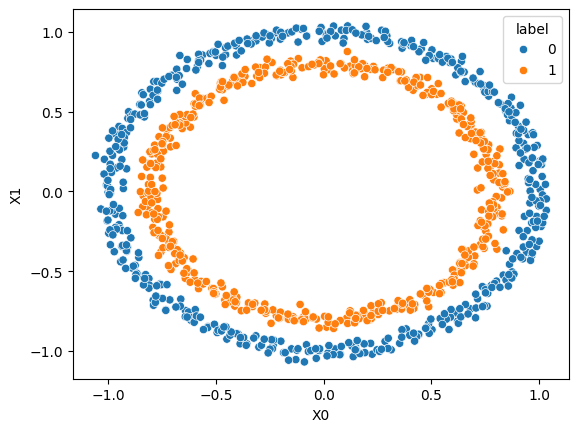

In [60]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
n_samples = 1000
X,y = make_circles(n_samples,
        noise = 0.03,
        random_state=42)
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
sns.scatterplot(data=circles,x="X0",y="X1",hue="label")


In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


C:\Users\karth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(
loss='binary_crossentropy',
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=['accuracy']
)
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5028 - loss: 0.6945
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6782 
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6895 - loss: 0.6646 
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.6406 
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.5671
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9315 - loss: 0.4373 
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9839 - loss: 0.2953 
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.1903 
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.1150 
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0766 


In [64]:
model.evaluate(X_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0759  


[0.07478000968694687, 1.0]

Text(0, 0.5, 'Loss Value')

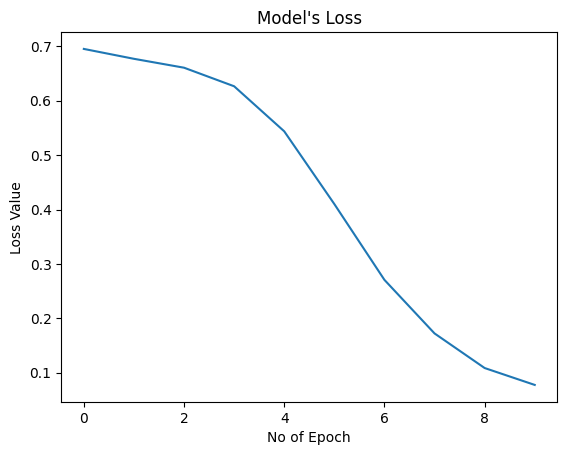

In [65]:
plt.title("Model's Loss")
plt.plot(history.history['loss'])
plt.xlabel("No of Epoch")
plt.ylabel("Loss Value")

In [66]:
def plotq(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary")
        y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary


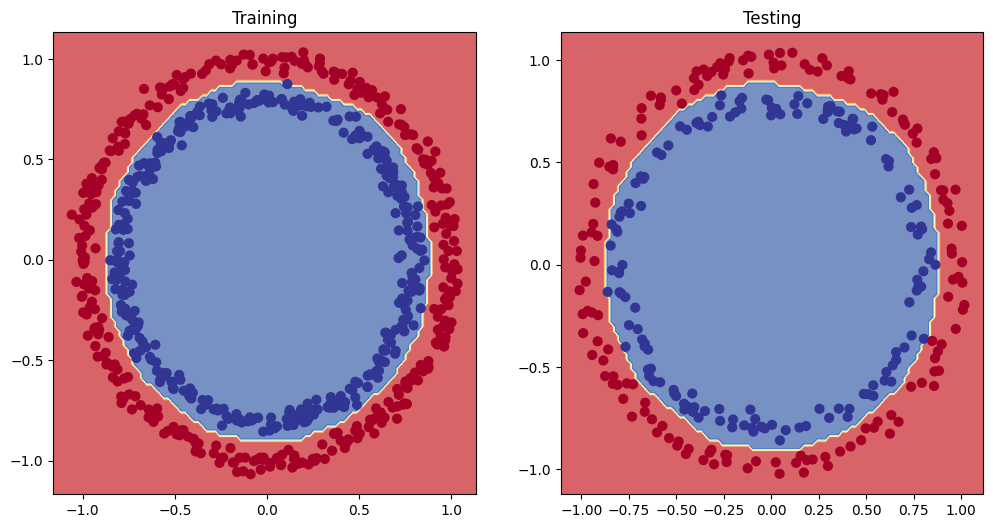

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plotq(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plotq(model,X_test,y_test)